# Nucleosynthesis: Modelling of the Sun.

## Step 0: Preparations.

In [1]:
# Import necessary modules and libraries.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

# Several key parameters.
NA = 6.022e23
ne0 = 7.6e25
c = 3e8
amu_kgConvert = 1.66053906892e-27

In [2]:
# Look up table for the elements to make our lives easier
elemChart = {
    'H1': 0,
    'H2': 1,
    'He3': 2,
    'He4': 3,
    'Li7': 4,
    'Be7': 5,
    'Be8': 6,
    'B8': 7,
    'C12': 8,
    'C13': 9,
    'N13': 10,
    'N14': 11,
    'N15': 12,
    'O15': 13,
    'O16': 14,
    'O17': 15,
    'F17': 16
}

elementMasses = {
    'H1': 1.007825,
    'H2': 2.014102,
    'He3': 3.016029,
    'He4': 4.002603,
    'Li7': 7.016003,
    'Be7': 7.016929, # Check again
    'Be8': 8.005305, # Check again
    'B8': 8.024607, # Check again
    'C12': 12.0,
    'C13': 13.003355,
    'N13': 13.005738, # Check again
    'N14': 14.003074,
    'N15': 15.000109,
    'O15': 15.003065, # Check again
    'O16': 15.994915,
    'O17': 16.999132,
    'F17': 17.999161, # Check again
    'electron': 0.00054858
}

energies = []

## Step 1: Main Sequence of the Sun.
- Firstly we extract T(t) and rho(t) of MS of Sun from MESA, see Ref [1].

In [3]:
t_MS = np.array([3.15400000e+02, 2.34708064e+03, 8.18736833e+03, 2.27198730e+04,
        5.88813952e+04, 1.48862834e+05, 3.72765447e+05, 9.29906799e+05,
        2.31625276e+06, 5.76592514e+06, 1.43498140e+07, 3.57092761e+07,
        8.88584532e+07, 2.21110613e+08, 5.50196307e+08, 1.36906683e+09,
        3.40667870e+09, 8.47690910e+09, 2.10932648e+10, 5.24867952e+10,
        1.30603944e+11, 3.24984410e+11, 8.08665206e+11, 2.01221781e+12,
        5.00704183e+12, 1.24591223e+13, 3.10022832e+13, 7.71436015e+13,
        1.68729650e+14, 2.93754522e+14, 4.48686353e+14, 6.26641132e+14,
        8.19131339e+14, 1.15716539e+15, 1.99830229e+15, 4.09132004e+15,
        9.29941799e+15, 2.22588323e+16, 4.53139258e+16, 6.63788717e+16,
        8.69151593e+16, 1.06956212e+17, 1.26432057e+17, 1.45260095e+17,
        1.63364568e+17, 1.80689541e+17, 1.97178733e+17, 2.12710589e+17,
        2.27265689e+17, 2.40078201e+17, 2.48751278e+17, 2.55338726e+17,
        2.61026835e+17, 2.66192997e+17, 2.70976098e+17, 2.75432788e+17,
        2.79589471e+17, 2.83463475e+17, 2.87070798e+17, 2.90427907e+17,
        2.93552242e+17, 2.96460201e+17, 2.99170316e+17, 3.01696264e+17,
        3.04051912e+17, 3.06251790e+17, 3.08308841e+17, 3.09859630e+17])  # t in seconds

T_MS = np.array([ 4193556.78238264,  4193556.78926517,  4193556.80837239,
         4193556.83620694,  4193556.87586608,  4193556.93072328,
         4193557.00296777,  4193557.09289475,  4193557.20094267,
         4193557.33632256,  4193557.53696479,  4193557.93423828,
         4193558.90012772,  4193561.30468861,  4193567.28806126,
         4193582.17646436,  4193619.2226116 ,  4193711.39924413,
         4193940.72678493,  4194511.13563691,  4195929.06548277,
         4199448.50978146,  4208152.74175886,  4229482.95254831,
         4280599.63349052,  4396939.83687512,  4636844.72615946,
         5072900.36213771,  5695563.7546347 ,  6433688.26068569,
         7432833.99318589,  8920794.15866744, 11227083.78083386,
        13628693.63121029, 13608183.86456236, 13587982.72344312,
        13630831.07228613, 13777406.61387227, 14056675.74596504,
        14337151.56034287, 14638154.37577485, 14962483.2251024 ,
        15311877.02279773, 15688584.35862349, 16093027.66311741,
        16527254.05662823, 16995740.79849428, 17486881.47946294,
        18027850.10943097, 18488457.70989186, 18675065.62552441,
        18738128.91122589, 18760237.5770754 , 18768338.55717096,
        18774642.14770271, 18781126.36079877, 18791373.59096955,
        18804108.45146665, 18819546.38876946, 18836425.03187551,
        18855813.74718263, 18874659.21389191, 18895802.84429321,
        18917814.26121215, 18940017.03956811, 18962352.8098699 ,
        18984968.14238863, 19002495.59599141])                        # T in K.

rho_MS = np.array([  1.39584697,   1.39584697,   1.39584698,   1.39584699,
          1.39584702,   1.39584704,   1.39584708,   1.39584714,
          1.39584721,   1.39584732,   1.39584752,   1.39584798,
          1.3958491 ,   1.3958519 ,   1.39585887,   1.39587622,
          1.39591937,   1.39602676,   1.39629398,   1.39695891,
          1.39861355,   1.40273134,   1.41298142,   1.43850836,
          1.50216737,   1.66166695,   2.06706204,   3.14298681,
          5.68506543,  10.43720775,  19.61025567,  38.05363067,
         70.01165536,  78.21922781,  79.48209826,  82.69182275,
         84.79254541,  88.7710978 ,  96.5555808 , 104.81427615,
        114.20647588, 124.97380623, 137.38343228, 151.71718195,
        168.38703485, 187.85328681, 210.6666307 , 236.28576558,
        267.46697655, 302.72112322, 332.50414948, 358.24035281,
        382.72884669, 407.03787467, 431.45689191, 456.26198213,
        481.55882827, 507.40563091, 533.75409075, 560.64152736,
        588.03952572, 615.8606101 , 644.16892439, 672.86565715,
        701.93959852, 731.40680454, 761.17231542, 785.32249953])    # rho in g/cm3

rho_MS_0 = rho_MS[0]


T_of_t = interp1d(t_MS, T_MS, kind='linear', fill_value='extrapolate')
rho_of_t = interp1d(t_MS, rho_MS, kind='linear', fill_value='extrapolate')

- Secondly we express rate of reactions within CNO, pp chains and triple alpha w.r.t T, using the data from Ref [2].

In [4]:

######################
# A) CNO cycles.
######################

#CNO1 cycles

from math import e


def CNO1_cycle(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for systems of the CNO1 cycle.

    Parameters
    ----------
    elements : np.array
        Numpy array containing the number densities of the elements.
    elemChart : dict
        Dictionary containing the positions of the elements in the elements array.
    temp : float
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        The differential equations for the system.
    """

    sigma_v_expectation = {
        "C12(p,g)N13": (
            (2.04e7 / (t9**(2/3)) * np.exp(-13.690 / (t9**(1/3)) - (t9 / 1.500)**2)
             * (1 + 0.030 * t9**(1/3) + 1.19 * t9**(2/3) + 0.254 * t9 + 2.06 * t9**(4/3) + 1.12 * t9**(5/3))
             + 1.08e5 * t9**(-3/2) * np.exp(-4.925 / t9)
             + 2.15e05 * t9**(-3/2) * np.exp(-18.179 / t9)
            )
        ),
        "C13(p,g)N14": (
            (8.01e7 / (t9**(2/3)) * np.exp(-13.717 / (t9**(1/3)) - (t9 / 2)**2)
             * (1 + 0.030 * t9**(1/3) + 0.958 * t9**(2/3) + 0.204 * t9 + 1.39 * t9**(4/3) + 0.753 * t9**(5/3))
             + 1.21e6 * t9**(-6/5) * np.exp(-5.701 / t9)
            )
        ),
        "N14(p,g)O15": (
            (4.90e7 / (t9**(2/3)) * np.exp(-15.228 / (t9**(1/3)) - (t9 / 3.294)**2)
             * (1 + 0.027 * t9**(1/3) - 0.778 * t9**(2/3) - 0.149 * t9 + 0.261 * t9**(4/3) + 0.127 * t9**(5/3))
             + 2.37e3 * t9**(-3/2) * np.exp(-3.011 / t9)
             + 2.19e4 * np.exp(-12.530 / t9)
            )
        ),
        "N15(p,a)C12": (
            (1.08e12 / (t9**(2/3)) * np.exp(-15.251 / (t9**(1/3)) - (t9 / 0.522)**2)
             * (1 + 0.027 * t9**(1/3) + 2.62 * t9**(2/3) + 0.501 * t9 + 5.36 * t9**(4/3) + 2.60 * t9**(5/3))
             + 1.19e8 * t9**(-3/2) * np.exp(-3.676 / t9)
             + 5.41e08 * t9**(-1/2) * np.exp(-8.926 / t9)
             + 0.5 * 4.72e08 * t9**(-3/2) * np.exp(-7.721 / t9)
             + 2.20e09 * t9**(-3/2) * np.exp(-11.418 / t9)
            )
        )
    }
    
    lambda_N13 = np.log(2) / (60*9.965) # half-life of N13 is 9.965 minutes
    lambda_O15 = np.log(2) / (122.24) # half-life of O15 is 122.24 seconds

    C12toN13 = sigma_v_expectation["C12(p,g)N13"] * elements[elemChart["C12"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    N13toC13 = lambda_N13 * elements[elemChart["N13"]]
    C13toN14 = sigma_v_expectation["C13(p,g)N14"] * elements[elemChart["C13"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    N14toO15 = sigma_v_expectation["N14(p,g)O15"] * elements[elemChart["N14"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    O15toN15 = lambda_O15 * elements[elemChart["O15"]]
    N15toC12 = sigma_v_expectation["N15(p,a)C12"] * elements[elemChart["N15"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA

    dX = {
        'H1': -C12toN13 - N15toC12 - C13toN14 - N14toO15,
        'He4': N15toC12,
        'C12': N15toC12 - C12toN13,
        'N13': C12toN13 - N13toC13,
        'C13': N13toC13 - C13toN14,
        'N14': C13toN14 - N14toO15,
        'O15': N14toO15 - O15toN15,
        'N15': O15toN15 - N15toC12
    }
    
    # Calculate energy released in the cycle by finding mass differences
    
    massDiffC12toN13 = C12toN13 * (elementMasses["C12"] + elementMasses["H1"] - elementMasses["N13"])
    massDiffN13toC13 = N13toC13 * (elementMasses["N13"] - elementMasses["C13"] - elementMasses["electron"])
    massDiffC13toN14 = C13toN14 * (elementMasses["C13"] + elementMasses["H1"] - elementMasses["N14"])
    massDiffN14toO15 = N14toO15 * (elementMasses["N14"] + elementMasses["H1"] - elementMasses["O15"])
    massDiffO15toN15 = O15toN15 * (elementMasses["O15"] - elementMasses["N15"] - elementMasses["electron"])
    massDiffN15toC12 = N15toC12 * (elementMasses["N15"] + elementMasses["H1"] - elementMasses["C12"] - elementMasses["He4"])
    
    totalMassDiff = (massDiffC12toN13 + massDiffN13toC13 + massDiffC13toN14 + massDiffN14toO15 + massDiffO15toN15 + massDiffN15toC12) * amu_kgConvert
    
    energyReleased = totalMassDiff * c**2   

    return dX, energyReleased


#CNO2 cycles

def CNO2_cycle(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for systems of the CNO1 cycle.

    Parameters
    ----------
    elements : np.array
        Numpy array containing the number densities of the elements.
    elemChart : dict
        Dictionary containing the positions of the elements in the elements array.
    temp : float
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        The differential equations for the system.
    """

    sigma_v_expectation = {
        "N14(p,g)O15": (
            (4.90e7 / (t9**(2/3))
            * np.exp(-15.228 / (t9**(1/3)) - (t9 / 3.294)**2)
            * (1 + 0.027 * t9**(1/3)
                - 0.778 * t9**(2/3)
                - 0.149 * t9
                + 0.261 * t9**(4/3)
                + 0.127 * t9**(5/3))
            + 2.37e3 * t9**(-3/2) * np.exp(-3.011 / t9)
            + 2.19e4 * np.exp(-12.530 / t9)
            )
        ),
        "N15(p,g)O16": (
            (9.78e8 / (t9**(2/3))
            * np.exp(-15.251 / (t9**(1/3)) - (t9 / 0.450)**2)
            * (1 + 0.027 * t9**(1/3)
                + 0.219 * t9**(2/3)
                + 0.042 * t9
                + 6.83 * t9**(4/3)
                + 3.32 * t9**(5/3))
            + 1.11e04 * t9**(-3/2) * np.exp(-3.328 / t9)
            + 1.49e04 * t9**(-3/2) * np.exp(-4.665 / t9)
            )
        ),
        "O16(p,g)F17": (
            (1.50e8
            / (t9**(2/3) * (1 + 2.13 * (1 - np.exp(-0.728 * t9**(2/3))))))
            * np.exp(-16.692 / (t9**(1/3)))
        ) * rho_factor**2,
        "O17(p,a)N14": (
            1.53e7 / (t9**(2/3))
            * np.exp(-16.712 / (t9**(1/3)) - (t9 / 0.565)**2)
        )
    }
    
    lambda_O15 = np.log(2) / (122.24) # half-life of O15 is 122.24 seconds
    lambda_F17 = np.log(2) / (64.49) # half-life of F17 is 64.49 seconds

    N14toO15 = sigma_v_expectation["N14(p,g)O15"] * elements[elemChart["N14"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    O15toN15 = lambda_O15 * elements[elemChart["O15"]]
    N15toO16 = sigma_v_expectation["N15(p,g)O16"] * elements[elemChart["N15"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    O16toF17 = sigma_v_expectation["O16(p,g)F17"] * elements[elemChart["O16"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA
    F17toO17 = lambda_F17 * elements[elemChart["F17"]]
    O17toN14 = sigma_v_expectation["O17(p,a)N14"] * elements[elemChart["O17"]] * elements[elemChart["H1"]] \
    * rho_factor**2 / NA

    dX = {
        "H1": -N14toO15 - N15toO16 - O16toF17 - O17toN14,
        "He4": O17toN14,
        "N14": O17toN14 - N14toO15,
        "O15": N14toO15 - O15toN15,
        "N15": O15toN15 - N15toO16,
        "O16": N15toO16 - O16toF17,
        "F17": O16toF17 - F17toO17,
        "O17": F17toO17 - O17toN14
    }
    
    # Calculate energy released in the cycle by finding mass differences
    
    massDiffN14toO15 = N14toO15 * (elementMasses["N14"] + elementMasses["H1"] - elementMasses["O15"])
    massDiffO15toN15 = O15toN15 * (elementMasses["O15"] - elementMasses["N15"] - elementMasses["electron"])
    massDiffN15toO16 = N15toO16 * (elementMasses["N15"] + elementMasses["H1"] - elementMasses["O16"])
    massDiffO16toF17 = O16toF17 * (elementMasses["O16"] + elementMasses["H1"] - elementMasses["F17"])
    massDiffF17toO17 = F17toO17 * (elementMasses["F17"] - elementMasses["O17"] - elementMasses["electron"])
    massDiffO17toN14 = O17toN14 * (elementMasses["O17"] + elementMasses["H1"] - elementMasses["N14"] - elementMasses["He4"])
    
    totalMassDiff = (massDiffN14toO15 + massDiffO15toN15 + massDiffN15toO16 + massDiffO16toF17 + massDiffF17toO17 + massDiffO17toN14) * amu_kgConvert
    
    energyReleased = totalMassDiff * c**2

    return dX, energyReleased


##############################
# B) Proton-Proton (PP) Chains.
##############################

lambda_b8_decay = np.log(2) / 0.77

def PP_chain_cycle(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for the pp-chain reaction network.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'H1', 'H2', 'He3', 'He4', 'Be7', 'Li7', 'B8'
    temp : float, optional
        Temperature of the system in K (default is 15e6 K).

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """

    # Extract current abundances (ensuring they are non-negative)
    H1  = max(elements[elemChart["H1"]], 0.0)
    H2  = max(elements[elemChart["H2"]], 0.0)
    He3 = max(elements[elemChart["He3"]], 0.0)
    He4 = max(elements[elemChart["He4"]], 0.0)
    Be7 = max(elements[elemChart["Be7"]], 0.0)
    Li7 = max(elements[elemChart["Li7"]], 0.0)
    B8  = max(elements[elemChart["B8"]], 0.0)

    # Assume a constant electron density
    ne = 7.6e25

    # Compute sigma*v expectation values (not final reaction rates yet)
    sigma_v_expectation = {
        "pp": 4.01e-15 * t9**(-2/3) * np.exp(-3.380 * t9**(-1/3)) / NA,
        "dp": 2.24e3 * t9**(-2/3) * np.exp(-3.720 * t9**(-1/3)) / NA,
        "33": 6.04e10 * t9**(-2/3) * np.exp(-12.276 * t9**(-1/3)) / NA,
        "34": 5.61e6 * (t9 / (1 + 4.95e-2 * t9))**(5/6) / (t9**(3/2)) * np.exp(-12.826 / ((t9 / (1 + 4.95e-2 * t9))**(1/3))) / NA,
        "EC": 1.34e-10 * t9**(-1/2) / NA,
        "li7p": 1.096e9 * t9**(-2/3) * np.exp(-8.472 * t9**(-1/3)) / NA,
        "be7p": 3.11e5 * t9**(-2/3) * np.exp(-10.262 * t9**(-1/3)) / NA
    }

    # Compute reaction rates using the expectation values
    r_pp   = H1 * H1 * sigma_v_expectation["pp"] * rho_factor**2
    r_dp   = H2 * H1 * sigma_v_expectation["dp"] * rho_factor**2
    r_33   = He3 * He3 * sigma_v_expectation["33"] * rho_factor**2
    r_34   = He3 * He4 * sigma_v_expectation["34"] * rho_factor**2
    r_EC   = Be7 * ne * sigma_v_expectation["EC"] * rho_factor**2
    r_li7p = Li7 * H1 * sigma_v_expectation["li7p"] * rho_factor**2
    r_be7p = Be7 * H1 * sigma_v_expectation["be7p"] * rho_factor**2
    r_b8   = B8 * lambda_b8_decay * rho_factor**2 

    # Construct differential equations for each species
    dH1_dt  = -2 * r_pp - r_dp - r_be7p - r_li7p + 2 * r_33
    dH2_dt  =  r_pp - r_dp
    dHe3_dt =  r_dp - 2 * r_33 - r_34
    dHe4_dt =  r_33 + 2 * r_li7p + 2 * r_b8 - r_34
    dBe7_dt =  r_34 - r_EC - r_be7p
    dLi7_dt =  r_EC - r_li7p
    dB8_dt  =  r_be7p - r_b8

    dX = {
        "H1":  dH1_dt,
        "H2":  dH2_dt,
        "He3": dHe3_dt,
        "He4": dHe4_dt,
        "Be7": dBe7_dt,
        "Li7": dLi7_dt,
        "B8":  dB8_dt
    }
    
    # Calculate energy released in the cycle by finding mass differences
    
    massDiffPP = r_pp * (2*elementMasses["H1"] - elementMasses["H2"] - elementMasses["electron"])
    massDiffDP = r_dp * (elementMasses["H2"] + elementMasses["H1"] - elementMasses["He3"])
    massDiff33 = r_33 * (2*elementMasses["He3"] - elementMasses["He4"] - 2*elementMasses["H1"])
    massDiff34 = r_34 * (elementMasses["He3"] + elementMasses["He4"] - elementMasses["Be7"])
    massDiffEC = r_EC * (elementMasses["Be7"] + elementMasses["electron"] - elementMasses["Li7"])
    massDiffLi7p = r_li7p * (elementMasses["Li7"] + elementMasses["H1"] - 2*elementMasses["He4"])
    massDiffBe7p = r_be7p * (elementMasses["Be7"] + elementMasses["H1"] - elementMasses["B8"])
    massDiffB8 = r_b8 * (elementMasses["B8"] - elementMasses["Be8"] - elementMasses["electron"])
    
    totalMassDiff = (massDiffPP + massDiffDP + massDiff33 + massDiff34 + massDiffEC + massDiffLi7p + massDiffBe7p + massDiffB8) * amu_kgConvert
    
    energyReleased = totalMassDiff * c**2

    return dX, energyReleased


##########################
# C) Triple-Alpha Process.
##########################

def triple_alpha(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for the triple-alpha process.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'He4', 'Be8', 'C12'
    temp : float, optional
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """

    # Compute sigma*v expectation values (not final reaction rates yet)
    sigma_v_expectation = {
        "HeBe": (
            (7.40e-5 * t9**(-1.5) * np.exp(-1.0663 / t9)) +
            4.164e9 * t9**(-2/3) * np.exp(-13.490 * t9 ** (-1/3) - (t9 / 0.098)**2)
            * (1 + 0.031*t9**(1/3) + 8.009*t9**(2/3) + 1.732*t9 + 49.883*t9**(4/3) + 27.426*t9**(5/3))
        ),
        "BeHe": (
            1.40e10 * t9 ** (3/2) * np.exp(1.0663 / t9)
        ),
        "BeC": (
            (1.30e2 * t9 ** (-1.5) * np.exp(-3.3364 / t9)) +
            2.510e7 * t9 ** (-2/3) * np.exp(-23.570 * t9 ** (-1/3) - (t9 / 0.235) ** 2)
        ),
        "CO": (
    (1.04e8 / t9**2 / (1 + 0.0489 * t9**(-2/3))**2) * np.exp(-32.120 * t9**(-1/3) - (t9 / 3.496)**2)
    +
    (1.76e8 / t9**2 / (1 + 0.2654 * t9**(-2/3))**2) * np.exp(-32.120 * t9**(-1/3))
    +
    (1.25e3 / t9**(3/2)) * np.exp(-27.499 / t9)
    +
    (1.43e-2 * t9**5) * np.exp(-15.541 / t9)
)

    }

    He4_to_Be8 = sigma_v_expectation["HeBe"] * elements[elemChart["He4"]]**2 * rho_factor**2 / NA
    Be8_to_He4 = sigma_v_expectation["BeHe"] * elements[elemChart["Be8"]] * rho_factor**2 / NA
    Be8_to_C12 = sigma_v_expectation["BeC"] * elements[elemChart["Be8"]] * elements[elemChart["He4"]] * rho_factor**2 / NA

    lambda_Be = np.log(2) / 8.19e-17

    dX = {
        "He4": -2 * He4_to_Be8 + 2 * Be8_to_He4 - Be8_to_C12,
        "Be8": He4_to_Be8 - Be8_to_He4 - Be8_to_C12 - lambda_Be * elements[elemChart["Be8"]],
        "C12": Be8_to_C12
    }
    
    # Calculate energy released in the cycle by finding mass differences
    
    massDiffHe4toBe8 = He4_to_Be8 * (2 * elementMasses["He4"] - elementMasses["Be8"])
    massDiffBe8toHe4 = Be8_to_He4 * (elementMasses["Be8"] - 2 * elementMasses["He4"])
    massDiffBe8toC12 = Be8_to_C12 * (elementMasses["Be8"] + elementMasses["He4"] - elementMasses["C12"])
    
    totalMassDiff = (massDiffHe4toBe8 + massDiffBe8toHe4 + massDiffBe8toC12) * amu_kgConvert
    
    energyReleased = totalMassDiff * c**2

    return dX, energyReleased

def C12toO16(elements, elemChart, elementMasses, t9, rho_factor):
    """
    Construct the differential equations for the C12 to O16 process.

    Parameters
    ----------
    elements : np.array
        Array containing the number densities of the elements.
    elemChart : dict
        Dictionary mapping element names to positions in the elements array.
        Expected keys: 'C12', 'He4', 'O16'
    temp : float, optional
        Temperature of the system in K.

    Returns
    -------
    dX : dict
        Dictionary containing the time derivatives of the element abundances,
        keyed by the element names.
    """

    # Compute sigma*v expectation values (not final reaction rates yet)
    forward_rate =  1.04e8 * (t9 ** 2) /( np.exp(1+0.0489 * (t9 ** 2/3)**2)) * np.exp(-32.120/(t9**(1/3)) - (t9/3.496)**2) + 1.76e8/(t9**2)*np.exp(-32.120/(t9**(1/3))) + 1.25e3/(t9**(3/2))*np.exp(-27.499/t9) + 1.43e-2*(t9**5)*np.exp(-15.541/t9)
    
    C12toO16 = forward_rate * elements[elemChart["C12"]] * elements[elemChart["He4"]] * rho_factor**2 / NA
    
    dX = {
        "C12": -C12toO16,
        "He4": -C12toO16,
        "O16": C12toO16
    }
    
    # Calculate energy released in the cycle by finding mass differences
    
    massDiffC12toO16 = C12toO16 * (elementMasses["C12"] + elementMasses["He4"] - elementMasses["O16"])
    
    totalMassDiff = massDiffC12toO16 * amu_kgConvert
    
    energyReleased = totalMassDiff * c**2
    
    return dX, energyReleased

- Thirdly we define a set of ODEs to be solved.

In [5]:
def diffEqs(t, elements, elemChart,elementMasses):
    """
    Differential equations governing the nuclear reaction networks.
    """
    temp = T_of_t(t)
    rho_now = rho_of_t(t)

    t9 = temp / 1e9  # convert to 10^9 K
    rho_factor = rho_now / rho_MS_0
    
    dCNO1, _ = CNO1_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    dCNO2, _ = CNO2_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    dtriple_alpha, _ = triple_alpha(elements, elemChart, elementMasses, t9, rho_factor)
    dpp_chain, _ = PP_chain_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    dC12O16, _ = C12toO16(elements, elemChart, elementMasses, t9, rho_factor)

    # Ensure dX is initialized as a numpy array
    dX = np.zeros_like(elements)

    # Directly assign the scalar derivatives without summation
    for key in dCNO1.keys():
        dX[elemChart[key]] = dCNO1[key]

    for key in dCNO2.keys():
        dX[elemChart[key]] = dCNO2[key]

    for key in dtriple_alpha.keys():
        dX[elemChart[key]] = dtriple_alpha[key]

    for key in dpp_chain.keys():
        dX[elemChart[key]] = dpp_chain[key]
    
    # for key in dC12O16.keys():
    #     dX[elemChart[key]] = dC12O16[key]

    # dX[np.abs(dX) < 1e-30] = 0.0
    
    # energies.append([ePP_chain, eCNO1, eCNO2, e3_alpha])

    return dX

- Then, solve the ODEs using initial abundance of the Sun.

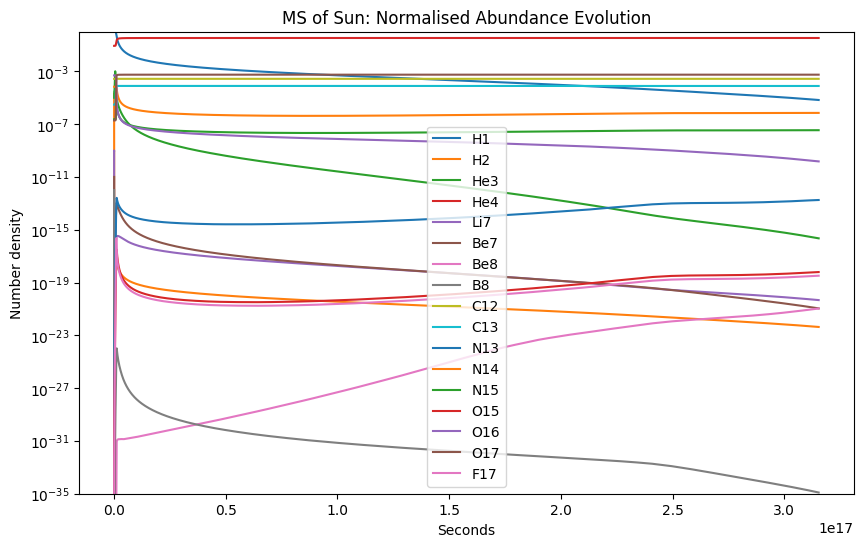

Final Time: 3.154000e+17 Seconds
Final Abundances:
H1: 6.724410e-06
H2: 4.298187e-23
He3: 2.226356e-16
He4: 3.350158e-01
Li7: 4.666631e-21
Be7: 1.102371e-21
Be8: 1.071942e-21
B8: 1.236912e-35
C12: 2.700000e-04
C13: 7.756920e-05
N13: 1.785051e-13
N14: 7.077699e-07
N15: 3.461574e-08
O15: 6.218899e-19
O16: 1.497577e-10
O17: 5.576775e-04
F17: 3.280868e-19


In [6]:
initialAbundances = np.zeros(len(elemChart))

H1_val = 1.0e25  # Normalized hydrogen number density

initialAbundances[elemChart['H1']] = H1_val
initialAbundances[elemChart['H2']] = H1_val * 2.0e-5         # Deuterium ~2e-5 of H1.
initialAbundances[elemChart['He3']] = H1_val * 1.0e-5        # Very low abundance.
initialAbundances[elemChart['He4']] = H1_val * 0.085         # Solar He/H ratio ~0.085.
initialAbundances[elemChart['Li7']] = H1_val * 1.0e-9        # Lithium is extremely rare.
initialAbundances[elemChart['Be7']] = H1_val * 1.0e-11       # Very scarce.
initialAbundances[elemChart['Be8']] = 0.0                    # 8Be is unstable.
initialAbundances[elemChart['B8']] = H1_val * 1.0e-12        # Boron is also very low.
initialAbundances[elemChart['C12']] = H1_val * 2.7e-4   # Solar C/H ~2.7e-4.
initialAbundances[elemChart['C13']] = H1_val * 3.0e-6  # C13 is much lower.
initialAbundances[elemChart['N14']] = H1_val * 6.8e-5   # Solar N/H ~6.8e-5.
initialAbundances[elemChart['N15']] = H1_val * 2.3e-7   # N15 is even lower.
initialAbundances[elemChart['O16']] = H1_val * 4.9e-4   # Solar O/H ~4.9e-4.
initialAbundances[elemChart['O17']] = H1_val * 1.9e-7   # O17 is very low.


t_start = 0.0
t_end   = 3.154e17


#solve the odes using solve_ivp.
#sols = solve_ivp(diffEqs, (t_start, t_end), initialAbundances, args=(elemChart,), method='BDF', rtol=1e-8, atol=1e-20)
sols = solve_ivp(diffEqs, (t_start, t_end), initialAbundances, args=(elemChart,elementMasses,), method='BDF', rtol=1e-10, atol=1e-22, max_step=1e14)

# Present the results.
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for key in elemChart.keys():
    ax.plot(sols.t, sols.y[elemChart[key]]/1e25, label=key)

#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Seconds')
ax.set_ylabel('Number density')
ax.legend()
ax.set_title('MS of Sun: Normalised Abundance Evolution')
ax.set_ylim(1e-35, 1)
plt.show()

# Ensure that the ODE solution exists before trying to access it
if 'sols' in globals() and hasattr(sols, 't') and hasattr(sols, 'y'):
    final_time = sols.t[-1]  # Extract the final time step
    final_values = sols.y[:, -1]/1e25  # Extract the final step values,normalised

    print(f"Final Time: {final_time:.6e} Seconds")
    print("Final Abundances:")
    for element, index in elemChart.items():
        print(f"{element}: {final_values[index]:.6e}")
else:
    print("Error: 'sols' is not properly defined. Ensure solve_ivp has been executed successfully.")

- Plus, it worth working on several key elements that has relatively larger abundance and have contribution to the following periods.

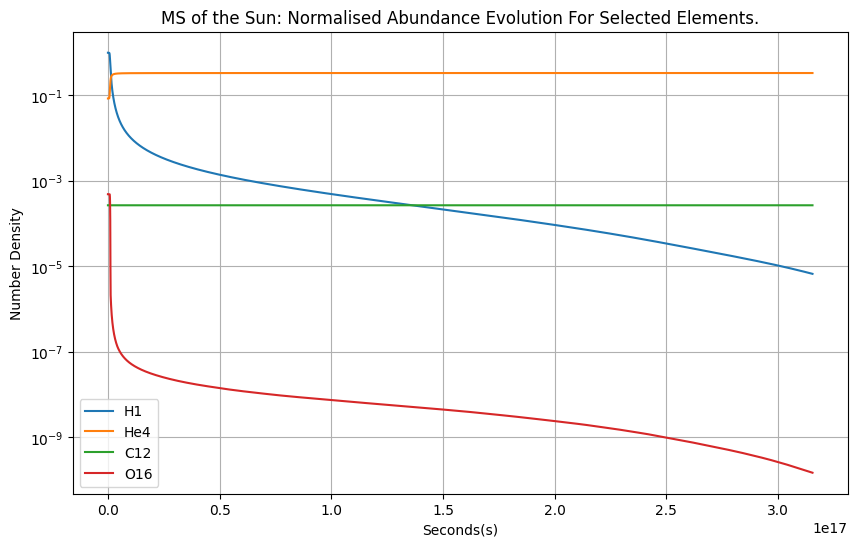

Final Time: 3.154000e+17 Seconds
Final Abundances of Selected Elements:
H1: 6.724410e-06
He4: 3.350158e-01
C12: 2.700000e-04
O16: 1.497577e-10
Final Mass Fractions:
H1: 5.002674e-06
He4: 9.898530e-01
C12: 2.391707e-03
O16: 1.768210e-09


In [7]:
# Ensure that the ODE solution exists before trying to access it
if 'sols' in globals() and hasattr(sols, 't') and hasattr(sols, 'y'):
    # Extract the time steps and the abundance evolution of selected elements
    time_steps = sols.t
    selected_elements = ["H1", "He4", "C12", "O16"]

    # Extract the corresponding abundance evolution data
    abundance_data = {element: sols.y[elemChart[element], :] for element in selected_elements}

    # Plot the abundance evolution for selected elements
    plt.figure(figsize=(10, 6))
    for element in selected_elements:
        plt.plot(time_steps, abundance_data[element]/1e25, label=element)

    plt.xlabel("Seconds(s)")
    plt.ylabel("Number Density")
    #plt.xscale("log")
    plt.yscale("log")  # Use logarithmic scale for better visualization
    plt.title("MS of the Sun: Normalised Abundance Evolution For Selected Elements.")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the final time and the final abundances of selected elements
    final_time = sols.t[-1]
    final_values = sols.y[:, -1]/1e25

    print(f"Final Time: {final_time:.6e} Seconds")
    print("Final Abundances of Selected Elements:")
    for element in selected_elements:
        print(f"{element}: {final_values[elemChart[element]]:.6e}")

else:
    print("Error: 'sols' is not defined. Make sure solve_ivp has been executed successfully.")


# Calculate total mass
total_mass = sum(final_values[elemChart[element]] * elementMasses[element] for element in elemChart)

# Convert number density to mass fraction
mass_fractions = {element: (final_values[elemChart[element]] * elementMasses[element]) / total_mass for element in elemChart}

# Print the final mass fractions
print("Final Mass Fractions:")
for element in selected_elements:
    print(f"{element}: {mass_fractions[element]:.6e}")

- Calculate and plot the energy generation rate (power) over time.

In [8]:
def energyReleased(t, elements, elemChart, elementMasses):
    temp = T_of_t(t)
    rho_now = rho_of_t(t)
    
    t9 = temp / 1e9  # convert to 10^9 K
    rho_factor = rho_now / rho_MS_0
    
    _, eCNO1 = CNO1_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    _, eCNO2 = CNO2_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    # _, e3_alpha = triple_alpha(elements, elemChart, elementMasses, t9, rho_factor)
    e3_alpha = 0
    _, ePP_chain = PP_chain_cycle(elements, elemChart, elementMasses, t9, rho_factor)
    _, eC12O16 = C12toO16(elements, elemChart, elementMasses, t9, rho_factor)
    
    energy = np.array([ePP_chain, eCNO1, eCNO2, e3_alpha, eC12O16])
    totalEnergy = np.sum(energy)
    
    return energy, totalEnergy

In [9]:
time_steps = sols.t
abundance_data = sols.y

print(abundance_data.shape)

energies = []
totalEnergies = []

for i in range(len(time_steps)):
    energy, totalEnergy = energyReleased(time_steps[i], abundance_data[:, i], elemChart, elementMasses)
    energies.append(energy)
    totalEnergies.append(totalEnergy)
    
energies = np.array(energies)
totalEnergies = np.array(totalEnergies)

(17, 15924)


In [10]:
print(time_steps)

[0.00000000e+00 1.46986735e-58 2.93973469e-58 ... 3.15206216e+17
 3.15306216e+17 3.15400000e+17]


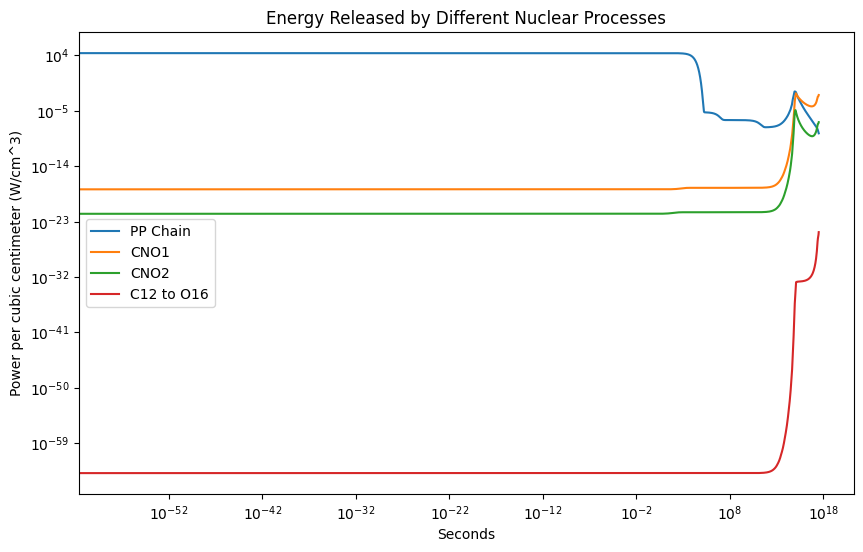

In [11]:
plt.figure(figsize=(10, 6))
# plt.plot(time_steps, totalEnergies, label='Total Energy')
plt.plot(time_steps, energies[:, 0], label='PP Chain')
plt.plot(time_steps, energies[:, 1], label='CNO1')
plt.plot(time_steps, energies[:, 2], label='CNO2')
# plt.plot(time_steps, energies[:, 3], label='Triple Alpha')
plt.plot(time_steps, energies[:, 4], label='C12 to O16')
plt.xlabel('Seconds')
plt.ylabel('Power per cubic centimeter (W/cm^3)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Energy Released by Different Nuclear Processes')
plt.show()

Percentage of energy generation from each reaction:

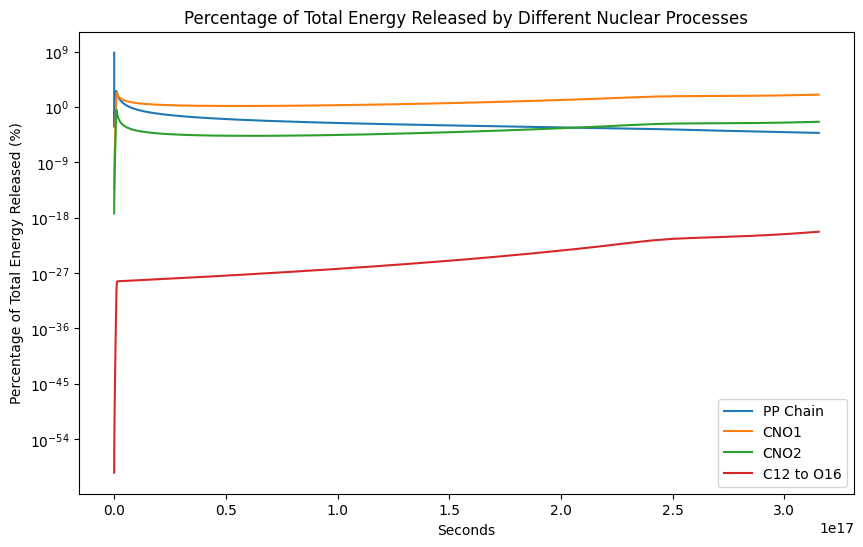

In [12]:
percentages = np.array([energy / totalEnergy for energy in energies]) * 100

plt.figure(figsize=(10, 6))
plt.plot(time_steps, percentages[:, 0], label='PP Chain')
plt.plot(time_steps, percentages[:, 1], label='CNO1')
plt.plot(time_steps, percentages[:, 2], label='CNO2')
# plt.plot(time_steps, percentages[:, 3], label='Triple Alpha')
plt.plot(time_steps, percentages[:, 4], label='C12 to O16')
plt.xlabel('Seconds')
plt.ylabel('Percentage of Total Energy Released (%)')
plt.yscale('log')
plt.legend()
plt.title('Percentage of Total Energy Released by Different Nuclear Processes')
plt.show()

In [13]:
# Print the starting percentage of energy released by each process

startPercentages = percentages[0]

print("Starting Percentages of Total Energy Released:")
print("PP Chain: {:.6e}%".format(startPercentages[0]))
print("CNO1: {:.6e}%".format(startPercentages[1]))
print("CNO2: {:.6e}%".format(startPercentages[2]))
# print("Triple Alpha: {:.6e}%".format(startPercentages[3]))
print("C12 to O16: {:.6e}%".format(startPercentages[3]))

print(np.sum(startPercentages))

Starting Percentages of Total Energy Released:
PP Chain: 6.441341e+08%
CNO1: 4.716712e-14%
CNO2: 5.009711e-18%
C12 to O16: 0.000000e+00%
644134104.8657322


In [14]:
# Print the final percentage of energy released by each process

final_percentages = percentages[-1]

print("Final Percentage of Energy Released by Different Processes:")
print("PP Chain: {:.6e}%".format(final_percentages[0]))
print("CNO1: {:.6e}%".format(final_percentages[1]))
print("CNO2: {:.6e}%".format(final_percentages[2])) 
# print("Triple Alpha: {:.6e}%".format(final_percentages[3]))
print("C12 to O16: {:.6e}%".format(final_percentages[4]))

print(np.sum(final_percentages))

Final Percentage of Energy Released by Different Processes:
PP Chain: 6.011052e-05%
CNO1: 9.999607e+01%
CNO2: 3.872595e-03%
C12 to O16: 5.261246e-21%
100.0


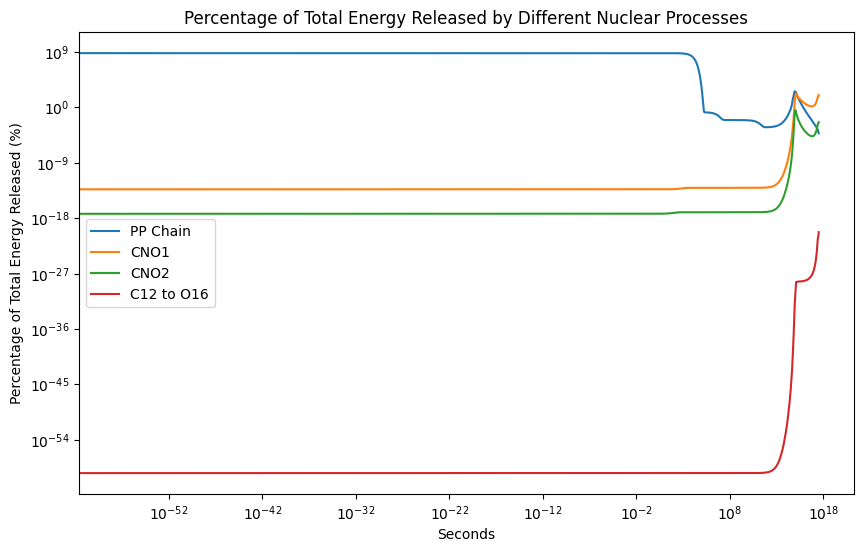

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(time_steps, percentages[:, 0], label='PP Chain')
plt.plot(time_steps, percentages[:, 1], label='CNO1')
plt.plot(time_steps, percentages[:, 2], label='CNO2')
# plt.plot(time_steps, percentages[:, 3], label='Triple Alpha')
plt.plot(time_steps, percentages[:, 4], label='C12 to O16')
plt.xlabel('Seconds')
plt.ylabel('Percentage of Total Energy Released (%)')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.title('Percentage of Total Energy Released by Different Nuclear Processes')
plt.show()

# Gamow Window


## Data Preperation

In [16]:
def mu(m1, m2):
    """Compute the reduced mass (in amu) of two nuclei with masses m1 and m2."""
    return (m1 * m2) / (m1 + m2)

gamow_params = {
    # PP chain reactions:
    'pp':    {'Z1': 1, 'Z2': 1, 'mu': mu(elementMasses['H1'], elementMasses['H1'])},
    'dp':    {'Z1': 1, 'Z2': 1, 'mu': mu(elementMasses['H1'], elementMasses['H2'])},
    '33':    {'Z1': 2, 'Z2': 2, 'mu': mu(elementMasses['He3'], elementMasses['He3'])},
    '34':    {'Z1': 2, 'Z2': 2, 'mu': mu(elementMasses['He3'], elementMasses['He4'])},
    'li7p':  {'Z1': 3, 'Z2': 1, 'mu': mu(elementMasses['Li7'], elementMasses['H1'])},
    'be7p':  {'Z1': 4, 'Z2': 1, 'mu': mu(elementMasses['Be7'], elementMasses['H1'])},

    # CNO1 cycle reactions:
    'C12(p,g)N13': {'Z1': 6, 'Z2': 1, 'mu': mu(elementMasses['C12'], elementMasses['H1'])},
    'C13(p,g)N14': {'Z1': 6, 'Z2': 1, 'mu': mu(elementMasses['C13'], elementMasses['H1'])},
    'N14(p,g)O15': {'Z1': 7, 'Z2': 1, 'mu': mu(elementMasses['N14'], elementMasses['H1'])},
    'N15(p,a)C12': {'Z1': 7, 'Z2': 1, 'mu': mu(elementMasses['N15'], elementMasses['H1'])},

    # CNO2 cycle reactions:
    'N15(p,g)O16': {'Z1': 7, 'Z2': 1, 'mu': mu(elementMasses['N15'], elementMasses['H1'])},
    'O16(p,g)F17': {'Z1': 8, 'Z2': 1, 'mu': mu(elementMasses['O16'], elementMasses['H1'])},
    'O17(p,a)N14': {'Z1': 8, 'Z2': 1, 'mu': mu(elementMasses['O17'], elementMasses['H1'])},

    # Triple-alpha process:
    # Step 1: He4 + He4 -> 8Be
    '3a1': {'Z1': 2, 'Z2': 2, 'mu': mu(elementMasses['He4'], elementMasses['He4'])},
    # Step 2: 8Be + He4 -> 12C
    '3a2': {'Z1': 4, 'Z2': 2, 'mu': mu(elementMasses['Be8'], elementMasses['He4'])}
}

# Print the parameters for verification:
for key, params in gamow_params.items():
    print(f"{key}: Z1={params['Z1']}, Z2={params['Z2']}, mu={params['mu']:.4f} u")

#times_to_plot = [t[0], t[len(t)//2], t[-1]]

pp: Z1=1, Z2=1, mu=0.5039 u
dp: Z1=1, Z2=1, mu=0.6717 u
33: Z1=2, Z2=2, mu=1.5080 u
34: Z1=2, Z2=2, mu=1.7200 u
li7p: Z1=3, Z2=1, mu=0.8812 u
be7p: Z1=4, Z2=1, mu=0.8813 u
C12(p,g)N13: Z1=6, Z2=1, mu=0.9297 u
C13(p,g)N14: Z1=6, Z2=1, mu=0.9353 u
N14(p,g)O15: Z1=7, Z2=1, mu=0.9402 u
N15(p,a)C12: Z1=7, Z2=1, mu=0.9444 u
N15(p,g)O16: Z1=7, Z2=1, mu=0.9444 u
O16(p,g)F17: Z1=8, Z2=1, mu=0.9481 u
O17(p,a)N14: Z1=8, Z2=1, mu=0.9514 u
3a1: Z1=2, Z2=2, mu=2.0013 u
3a2: Z1=4, Z2=2, mu=2.6684 u


In [17]:
len_mid = int(len(t_MS)/2) # get index for middle of the time sequence
times_to_plot = [0.0, t_MS[len_mid]/2, t_MS[-1]]

def compute_gamow_window(Z1, Z2, mu_val, t):
    """Returns (E0, DeltaE) in keV for given charges, reduced mass mu_val, and T (K)."""
    T = T_of_t(t)
    T9 = T / 1e9
    E0 = 12.2 * ((Z1**2 * Z2**2 * mu_val)**(1/3)) * (T9**(2/3))
    kT = 8.617e-5 * T  # keV
    DeltaE = 4 * np.sqrt(E0 * kT / 3)
    return E0, DeltaE

E_vals_pp = np.linspace(-10,10, 300)   # narrower range for PP
E_vals_cno = np.linspace(-1,8, 300)  # slightly larger range for CNO
E_vals_3a = np.linspace(-1,8, 400)  # even larger range for triple-a


def plot_gamow(ax, reaction_label, E_array, times, color_list):
    """
    Plot the Gamow window for a single reaction at multiple times,
    using the provided E_array for the x-axis.
    """
    params = gamow_params[reaction_label]
    Z1, Z2, mu_val = params['Z1'], params['Z2'], params['mu']

    for i, t_val in enumerate(times):
        E0, DeltaE = compute_gamow_window(Z1, Z2, mu_val, t_val)
        sigma = DeltaE / 2.0
        # Gaussian approximation
        gw = np.exp(-((E_array - E0)**2) / (sigma**2))
        ax.plot(E_array, gw, label=f"{reaction_label}, t={t_val:.1e}\nE0={E0:.2f}, ΔE={DeltaE:.2f}",
                color=color_list[i % len(color_list)])

    ax.set_xlabel("Energy (keV)")
    ax.set_ylabel("Relative Probability")
    ax.grid(True)
    ax.legend(fontsize=8)


# Colors for times
colors = ["red", "blue", "green"]  # one color per time

## PP chain

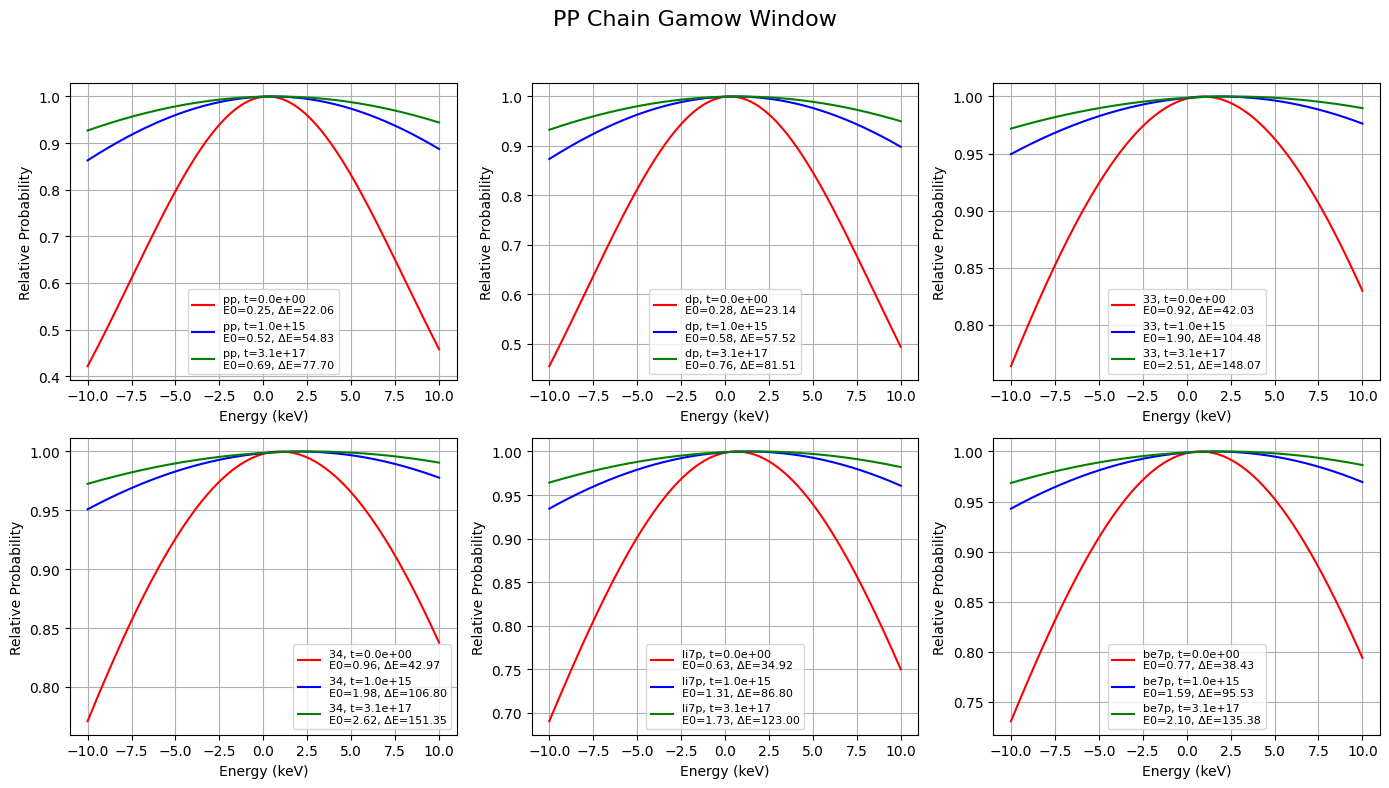

In [18]:
pp_keys = ['pp', 'dp', '33', '34', 'li7p', 'be7p']
fig_pp, axs_pp = plt.subplots(2, 3, figsize=(14, 8))
axs_pp = axs_pp.flatten()
for i, key in enumerate(pp_keys):
    plot_gamow(axs_pp[i], key, E_vals_pp, times_to_plot, colors)

fig_pp.suptitle("PP Chain Gamow Window", fontsize=16)
fig_pp.tight_layout(rect=[0, 0, 1, 0.95])

## CNO1 Cycle

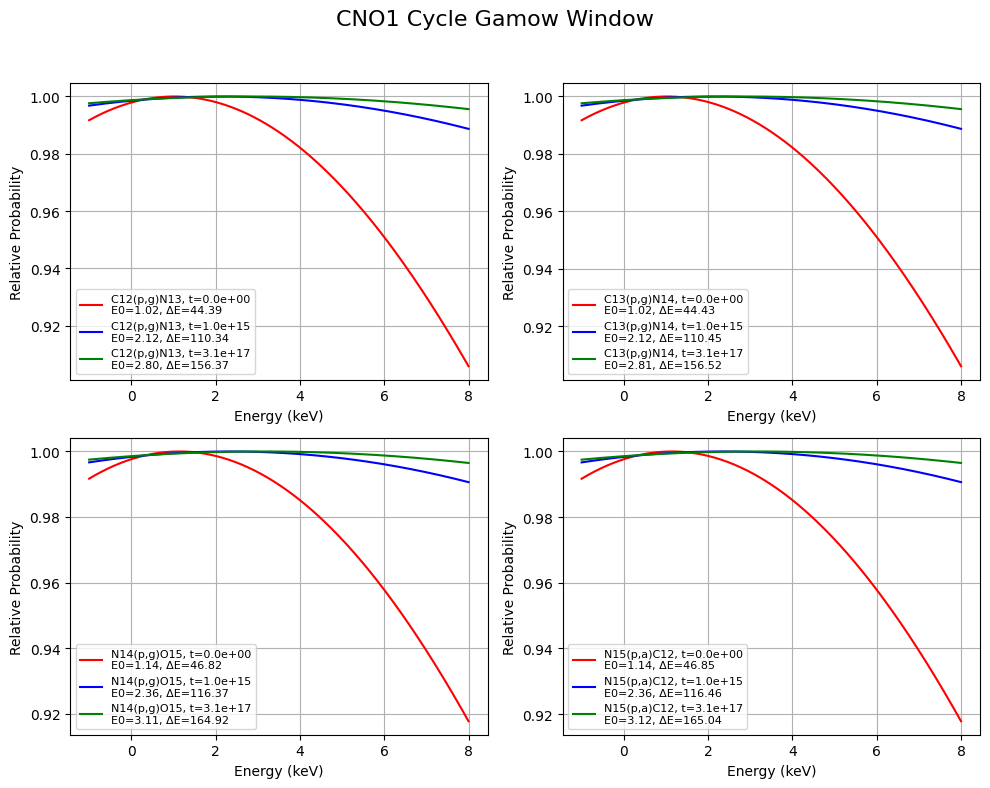

In [19]:
cno1_keys = ['C12(p,g)N13', 'C13(p,g)N14', 'N14(p,g)O15', 'N15(p,a)C12']
fig_cno1, axes_cno1 = plt.subplots(2, 2, figsize=(10, 8))
axes_cno1 = axes_cno1.flatten()

for i, key in enumerate(cno1_keys):
    plot_gamow(axes_cno1[i], key, E_vals_cno, times_to_plot, colors)


fig_cno1.suptitle("CNO1 Cycle Gamow Window", fontsize=16)
fig_cno1.tight_layout(rect=[0, 0, 1, 0.95])

## CNO2 Cycle

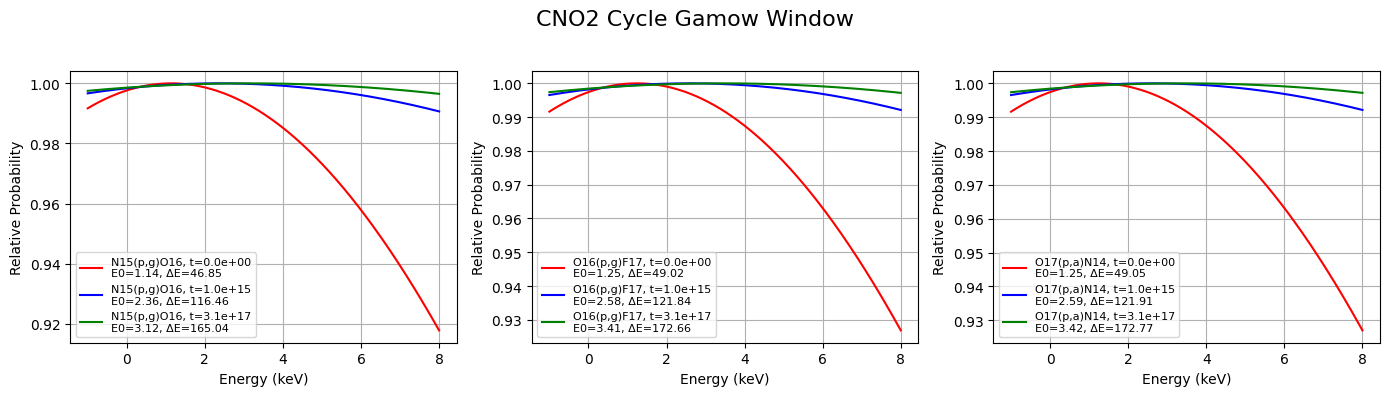

In [20]:
cno2_keys = ['N15(p,g)O16', 'O16(p,g)F17', 'O17(p,a)N14']
fig_cno2, axes_cno2 = plt.subplots(1, 3, figsize=(14, 4))
axes_cno2 = axes_cno2.flatten()

for i, key in enumerate(cno2_keys):
    plot_gamow(axes_cno2[i], key, E_vals_cno, times_to_plot, colors)

fig_cno2.suptitle("CNO2 Cycle Gamow Window", fontsize=16)
fig_cno2.tight_layout(rect=[0, 0, 1, 0.95])

## Triple Alpha

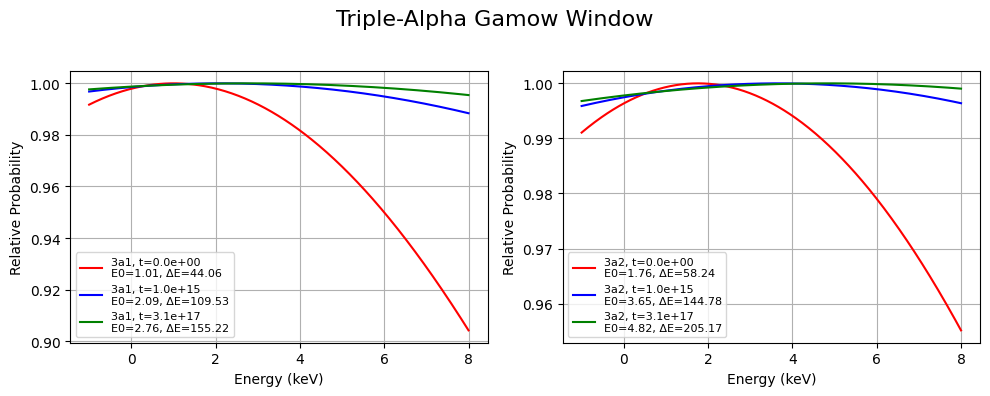

In [21]:
threea_keys = ['3a1', '3a2']
fig_3a, axes_3a = plt.subplots(1, 2, figsize=(10, 4))
axes_3a = axes_3a.flatten()

for i, key in enumerate(threea_keys):
    plot_gamow(axes_3a[i], key, E_vals_3a, times_to_plot, colors)

fig_3a.suptitle("Triple-Alpha Gamow Window", fontsize=16)
fig_3a.tight_layout(rect=[0, 0, 1, 0.95])

## Final Ouput

In [22]:
# Assume t_MS, T_of_t_linear, and compute_gamow_window have been defined.

final_time = t_MS[-1]  # Use the final time, for example t_MS
T_final = T_of_t(final_time)

print("Final Gamow Window values at t = {:.2e} s (T = {:.2e} K):".format(final_time, T_final))
for reaction, params in gamow_params.items():
    E0, DeltaE = compute_gamow_window(params['Z1'], params['Z2'], params['mu'], T_final)
    print(f"{reaction}: E0 = {E0:.2f} keV, ΔE = {DeltaE:.2f} keV")

Final Gamow Window values at t = 3.10e+17 s (T = 1.90e+07 K):
pp: E0 = 0.25 keV, ΔE = 22.06 keV
dp: E0 = 0.28 keV, ΔE = 23.14 keV
33: E0 = 0.92 keV, ΔE = 42.03 keV
34: E0 = 0.96 keV, ΔE = 42.97 keV
li7p: E0 = 0.63 keV, ΔE = 34.92 keV
be7p: E0 = 0.77 keV, ΔE = 38.43 keV
C12(p,g)N13: E0 = 1.02 keV, ΔE = 44.39 keV
C13(p,g)N14: E0 = 1.02 keV, ΔE = 44.43 keV
N14(p,g)O15: E0 = 1.14 keV, ΔE = 46.82 keV
N15(p,a)C12: E0 = 1.14 keV, ΔE = 46.85 keV
N15(p,g)O16: E0 = 1.14 keV, ΔE = 46.85 keV
O16(p,g)F17: E0 = 1.25 keV, ΔE = 49.02 keV
O17(p,a)N14: E0 = 1.25 keV, ΔE = 49.05 keV
3a1: E0 = 1.01 keV, ΔE = 44.06 keV
3a2: E0 = 1.76 keV, ΔE = 58.24 keV


# Machine Learning Try

X shape: (15924, 1) Y_log shape: (15924, 17)
Train set: (12739, 1) (12739, 17)
Test  set: (3185, 1) (3185, 17)


C:\Users\saipr\AppData\Local\Temp\ipykernel_18232\1400829951.py:11: RuntimeWarning: divide by zero encountered in log10
  X = np.log10(time_data).reshape(-1, 1)  # (n_points, 1)
c:\Users\saipr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,617 (37.57 KB)

 Trainable params: 9,617 (37.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
319/319 - 1s - 3ms/step - loss: 198.0766 - val_loss: 125.2839
Epoch 2/200
319/319 - 0s - 947us/step - loss: 77.7096 - val_loss: 57.7225
Epoch 3/200
319/319 - 0s - 947us/step - loss: 55.0304 - val_loss: 53.7908
Epoch 4/200
319/319 - 0s - 939us/step - loss: 52.0738 - val_loss: 50.1773
Epoch 5/200
319/319 - 0s - 948us/step - loss: 47.1662 - val_loss: 44.0550
Epoch 6/200
319/319 - 0s - 944us/step - loss: 39.8152 - val_loss: 35.3845
Epoch 7/200
319/319 - 0s - 933us/step - loss: 30.3043 - val_loss: 25.1548
Epoch 8/200
319/319 - 0s - 938us/step - loss: 20.0774 - val_loss: 15.4958
Epoch 9/200
319/319 - 0s - 937us/step - loss: 11.7884 - val_loss: 8.6299
Epoch 10/200
319/319 - 0s - 952us/step - loss: 6.8212 - val_loss: 5.5744
Epoch 11/200
319/319 - 0s - 959us/step - loss: 5.1130 - val_loss: 4.8113
Epoch 12/200
319/319 - 0s - 953us/step - loss: 4.7305 - val_loss: 4.6189
Epoch 13/200
319/319 - 0s - 941us/step - loss: 4.5708 - val_loss: 4.5003
Epoch 14/200
319/319 - 0s - 940us/step - lo

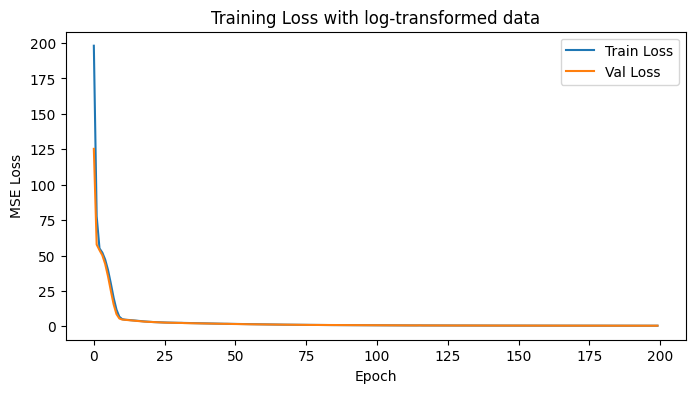

In [23]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# get data from ODE
time_data = sols.t                # shape (n_points,)
Y_raw = sols.y.T/1e25                  # transpose:shape (n_points, n_species)
species_list = list(elemChart.keys())  # ['H1','H2','He3',..., 'O17']

eps = 1e-30  # prevent log(0)
X = np.log10(time_data).reshape(-1, 1)  # (n_points, 1)

# do log10(abundunce + eps) for all elements
Y_log = np.log10(Y_raw + eps)  # (n_points, n_species)

print("X shape:", X.shape, "Y_log shape:", Y_log.shape)


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y_log, test_size=0.2, random_state=42, shuffle=True
)

print("Train set:", X_train.shape, Y_train.shape)
print("Test  set:", X_test.shape, Y_test.shape)

# build and train NN
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(Y_train.shape[1])  # output dim = n_species
])


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=optimizer, loss='mse')
model.summary()

history = model.fit(
    X_train, Y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    verbose=2
)


plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Training Loss with log-transformed data")
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


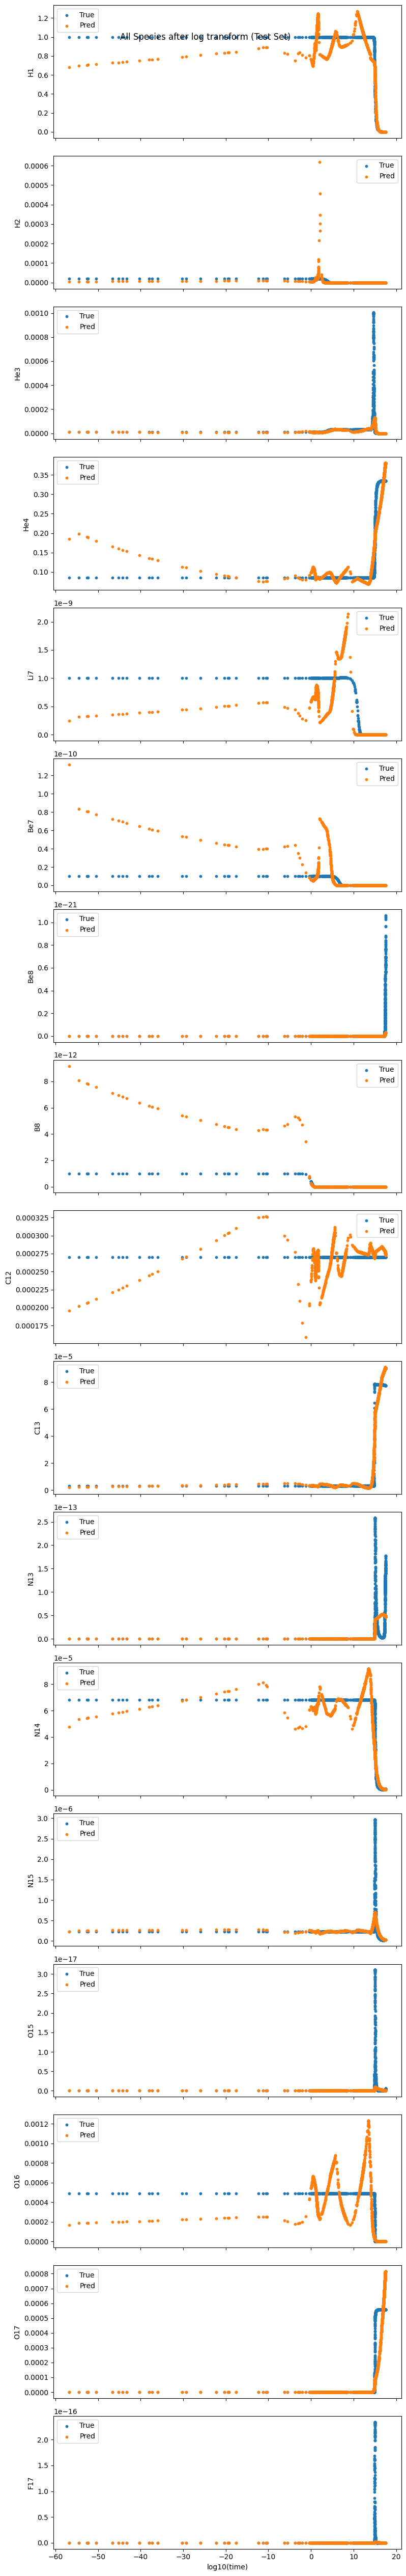

In [24]:
Y_test_pred = model.predict(X_test)

# do 10** to inversely going back to initial abundance
Y_test_pred_raw = 10**(Y_test_pred)
Y_test_raw = 10**(Y_test)

fig, axes = plt.subplots(len(species_list), 1, figsize=(8, 3*len(species_list)), sharex=True)
for i, sp in enumerate(species_list):
    axes[i].scatter(X_test[:, 0], Y_test_raw[:, i], s=10, label='True')
    axes[i].scatter(X_test[:, 0], Y_test_pred_raw[:, i], s=10, label='Pred')
    axes[i].set_ylabel(sp)
    axes[i].legend()

axes[-1].set_xlabel("log10(time)")
plt.suptitle("All Species after log transform (Test Set)")
plt.tight_layout()
plt.show()